## 描述性統計與模型建立

## Wine Quality

Wine Quility 資料集包含兩個檔案（會合併成一個），一個是紅酒，一個是白酒，以處理變種的西班牙「Vinho Verde」酒。紅酒檔案含有 1,599 個觀測值，白酒檔案有 4,898 筆觀測值。兩個檔案都有一個輸出變數（應變數）與十一個輸入變數（自變數）。輸出變數是品質，它的分數從 0 （低品質）到 10 （高品質）。輸入變數是酒的物理化學特徵，包括固定酸度（fixed acidity）、揮發性酸度（volatile acidity）、檸檬酸（citric acid）、殘糖（residual sugar）、氯化物（chlorides）、游離二氧化硫（free sulfur dioxide）、二氧化硫總量（total sulfur dioxide）、密度（density）、酸鹼值（pH）、硫酸鹽（sulphates）和酒精（alcohol）。

In [1]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

# Read the data set into a pandas DataFrame
wine = 
# sep=',' 指出欄位分隔符號是逗號，header=0 指欄位標題在第一列
wine.columns = wine.columns.str.replace(' ', '_') # 將空格置換成底線
print(wine.head()) # 檢查標題列與前五列資料是否正確載入

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [2]:
# Display descriptive statistics for all variables
print(wine.describe())  # 印出資料集每一個數值變數的摘要統計。它回報的統計是數量、平均值、標準差、最小值、第 25 百分位值、中位數、
                        # 第 75 百分位值與最大值。例如「quality」觀測值有 6,497 筆，分數範圍是 3 到 9，平均品質分數是 5.8，
                        # 標準差是 0.87

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [3]:
# Identify unique values
print(sorted(wine.quality.unique()))  # unique 函數會去除其中重複的元素，識別 quality 欄位的各種值，並按升冪順序印出

[3, 4, 5, 6, 7, 8, 9]


In [4]:
# Calculate value frequencies
print(wine.quality.value_counts()) # 計算每一個值在 quality 欄位出現的次數，並依次數的降冪排序印出

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [5]:
# Display descriptive statistics for quality by wine type
print(wine.groupby('type')[['alcohol']].describe()) 

# groupby 函式使用 type 欄位的兩種值（red, white）來將資料分成兩組，我們使用方括號來列出想要輸出的欄位組合。這些指令執行結果是
# 一個欄位的統計數據，紅酒與白酒的結果會垂直地疊在一起。

      alcohol                                                 
        count       mean       std  min  25%   50%   75%   max
type                                                          
red    1599.0  10.422983  1.065668  8.4  9.5  10.2  11.1  14.9
white  4898.0  10.514267  1.230621  8.0  9.5  10.4  11.4  14.2


In [6]:
print(wine.groupby('type')[['alcohol']].describe().unstack('type')) 

# unstack 函式會將結果重新格式化，讓紅酒與白酒的統計可以水平顯示成兩個獨立的欄位。

                type 
alcohol  count  red      1599.000000
                white    4898.000000
         mean   red        10.422983
                white      10.514267
         std    red         1.065668
                white       1.230621
         min    red         8.400000
                white       8.000000
         25%    red         9.500000
                white       9.500000
         50%    red        10.200000
                white      10.400000
         75%    red        11.100000
                white      11.400000
         max    red        14.900000
                white      14.200000
dtype: float64


In [7]:
# Calculate specific quantiles
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type')) 

# 使用 quantile 函數來顯示 quality 欄位中，第 25 與 75 個百分位值。

     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0


In [8]:
# 按照酒的類型，查看品質的分布

red_wine = wine.loc[wine['type'] == 'red', 'quality']  # loc 取出紅酒(wine['type'] == red)的 quality 欄位值
white_wine = wine.loc[wine['type'] == 'white', 'quality'] # loc 取出白酒(wine['type' == white])的 quality 欄位值

print(red_wine)
print(white_wine)

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64
1599    6
1600    6
1601    6
1602    6
1603    6
1604    6
1605    6
1606    6
1607    6
1608    6
1609    5
1610    5
1611    5
1612    7
1613    5
1614    7
1615    6
1616    8
1617    6
1618    5
1619    8
1620    7
1621    8
1622    5
1623    6
1624    6
1625    6
1626    6
1627    6
1628    7
       ..
6467    6
6468    6
6469    7
6470    

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


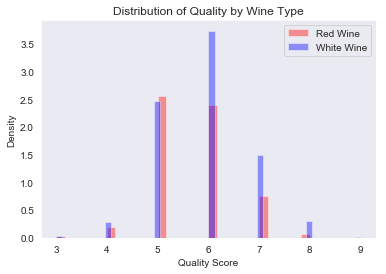

In [9]:
# 使用 seaborn 來建立有兩張長條圖的圖表。因為白酒比紅酒多（4,898 種白酒與 1,599 種紅酒），這張圖顯示標準化的密度分布，
# 而不是頻率分布。這張圖顯示，紅酒與白酒的品質分數大致上呈現常態分布。與原始摘要統計相比，這張長條圖可以讓你更容易看到兩種酒
# 的品質分數分布情形。

sns.set_style("dark")
print(sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red Wine"))
print(sns.distplot(white_wine, norm_hist=True, kde=False, color="blue", label="White Wine"))
sns.utils.axlabel("Quality Score", "Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend() # 圖例就是為了幫助我們展示每個資料對應的圖像名稱，更好的讓讀者認識到你的資料結構。
             # legend 將要顯示的資訊來自於上面代碼中的 label.
plt.show()

In [10]:
# 進行 t 檢定來計算紅酒與白酒的平均品質是否不同

print(wine.groupby(['type'])[['quality']].agg(['std'])) # 使用 groupby 與 agg 函式來計算一組統計數據，來區分資料集的群組。
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine) # 使用匯總變異數(pooled variance) t 檢定
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue)) # t 統計是 -9.69，p 值是 0.00，代表白酒的平均品質分數在統計上大於
                                                    # 紅酒的平均品質分數

        quality
            std
type           
red    0.807569
white  0.885639
tstat: -9.686 pvalue: 0.0000


In [11]:
# Calculate correlation matrix for all variables 計算所有變數的相關性矩陣
print(wine.corr()) # corr 函式會計算這個資料集每一對變數之間的線性關連。根據係數的符號，輸出認為 alcohol、sulphates、pH、
                   # free_sulfur_dioxide 與 citric_acid 都與 quality 有正相關性。
                   # fixed_acidity、volatile_acidity、residual_sugar、chlorides、total_sulfur_dioxide 與 density 與
                   # quality 有負相關性。

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

In [12]:
# Look at relationship between pairs of variables
# Take a "small" sample of red and white wines for plotting

# 這個資料集有超過六千多個資料點，所以如果我們將它們全部畫出，將會難以看出各個點。為了解決這個問題，這裡定義一個函式 take_sample
# 我們會用他來建立一個資料點的小樣本，在圖表中使用。這個函式使用 pandas DataFrame 索引與 numpy 的 random.choice 函式來隨機選擇
# 一組資料列。我們使用這個函式來製作一個紅酒的樣本，與一個白酒的樣本，接著將這些 DataFrame 串接成一個 DataFrame。接著我們在酒
# DataFrame 中，建立一個新欄位 in_sample，並使用 numpy 的 where 函式與 pandas 的 isin 函式，在那一欄填入 1 與 0，依該列的索引
# 值是不是樣本裡的其中一個索引值而定。最後，我們使用 pandas crosstab 函式來確認 in_sample 欄位裡有 400 個 1(200 個紅酒與 200 個
# 白酒)與 6,097 個 0。

def take_sample(data_frame, replace=False, n=200):
	return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]	

reds = wine.loc[wine['type']=='red', :]       # 1,599 筆紅酒的資料。
whites = wine.loc[wine['type']=='white', :]   # 4,898 筆白酒的資料。

reds_sample = take_sample(wine.loc[wine['type']=='red', :])      # 200 筆紅酒的樣本資料。
whites_sample = take_sample(wine.loc[wine['type']=='white', :])  # 200 筆白酒的樣本資料。

wine_sample = pd.concat([reds_sample, whites_sample]) # 400 筆紅酒與白酒樣本資料

wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.) # 建立一個新欄位 in_sample，np.where(condition, x, y)，
                                                                        # 滿足條件(condition)，輸出 x，不滿足輸出 y，
                                                                        # 即是樣本資料的為 1，不是樣本資料的為 0。

reds_sample = reds.loc[np.random.choice(reds.index, 100)]
whites_sample = whites.loc[np.random.choice(whites.index, 100)]
wine_sample = pd.concat([reds_sample, whites_sample], ignore_index=True) # 使用 concat 合併 ，axis=0 為橫向合併（列），
                                                                         # axis=1 為直向合併（行），預設 axis = 0。
                                                                         # ignore_index = True 可以忽略合併時舊的 index 欄位，
                                                                         # 改採用自動產生的 index。

print(pd.crosstab(wine.type, wine.in_sample,  margins=True))  # crosstab 第一個參數是行, 第二個參數是列. 還可以添加第三個參數，
                                                              # 同時, 行和列都可以是復合的。
                                                              # 傳入 margins=True 添加加分小計。這將會添加標籤為 ALL 的行和列，
                                                              # 其值對應於單個等級中所有數據的分組統計。

in_sample   0.0  1.0   All
type                      
red        1399  200  1599
white      4698  200  4898
All        6097  400  6497


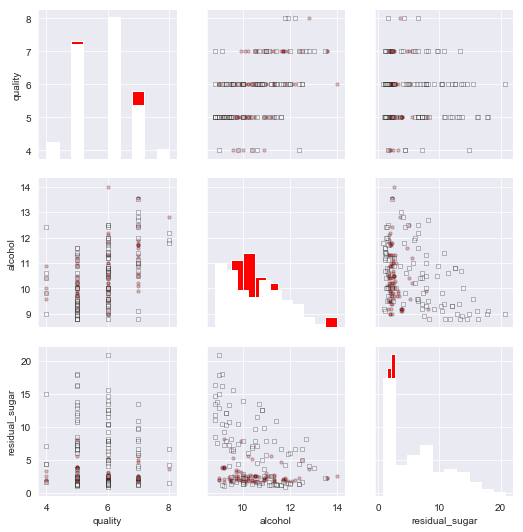

In [13]:
sns.set_style("dark")
sns.set_style("darkgrid", {"legend.scatterpoints": 0})
pg = sns.PairGrid(wine_sample, hue="type", hue_order=["red", "white"], \
palette=dict(red="red", white="white"), hue_kws={"marker": ["o", "s"]}, vars=['quality', 'alcohol', 'residual_sugar'])
pg.x = wine_sample.loc[wine_sample['type']=='red', 'quality']
pg = pg.map_diag(plt.hist)
pg.x = wine_sample.loc[wine_sample['type']=='white', 'quality']
pg = pg.map_diag(plt.hist)
pg = pg.map_offdiag(plt.scatter, edgecolor="black", s=10, alpha=0.25)
plt.show()

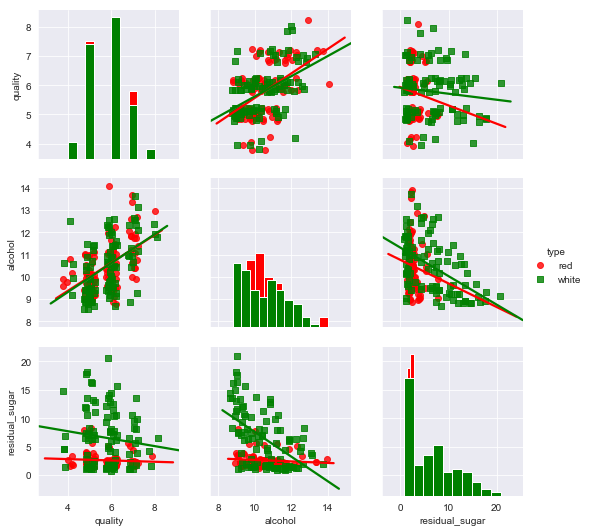

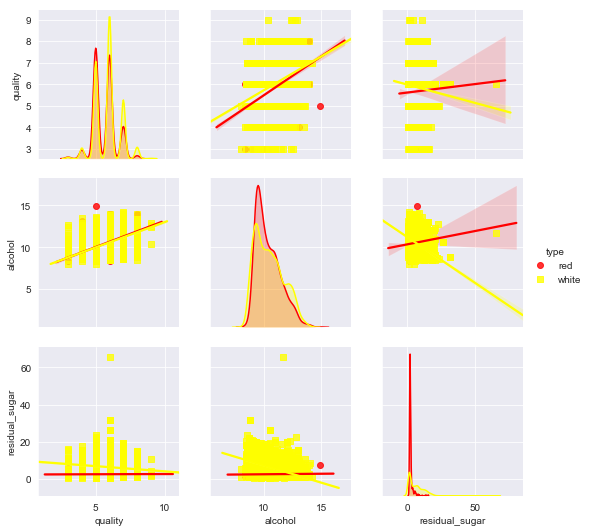

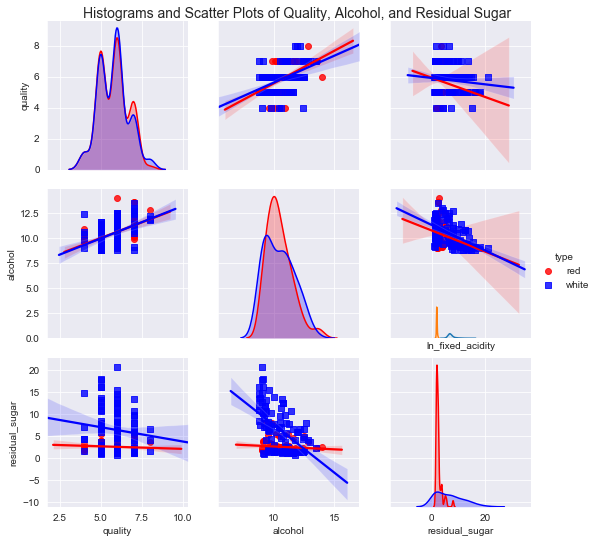

In [14]:
# 下圖配對圖表，顯示 quality, alcohol 與 residual_sugar 之間的關係。紅色長條與圓點代表紅酒，綠色長條與綠點代表白酒。以兩種酒
# 三個變數繪製的圖表，包含配對散布圖、迴歸線及長條圖。這張圖表顯示紅酒與白酒的 alcohol 的平均值與標準差是相似的，但是白酒的 
# residual_sugar 的平均值與標準差值大於紅酒的這兩個值。
# 迴歸線指出，紅酒與白酒的品質會隨著 alcohol 的增加而上升，但會隨著 residual_sugar 的增加而降低。這兩種因素對白酒有較大的影響。

g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False, "x_jitter": 0.25, "y_jitter": 0.25}, \
hue='type', diag_kind='hist', diag_kws={"bins": 10, "alpha": 1.0}, palette=dict(red="red", white="green"), \
markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])

sns.set_style({'legend.frameon': True,'legend.numpoints': 0,'legend.scatterpoints': 0})

wine_all_plot = sns.pairplot(wine, kind='reg', hue='type', palette=dict(red="red", white="yellow"), markers=["o", "s"], \
                             vars=['quality', 'alcohol', 'residual_sugar'])

wine_sample_plot = sns.pairplot(wine_sample, kind='reg', hue='type', palette=dict(red="red", white="blue"),\
                                markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])

wine['ln_fixed_acidity'] = np.log(wine.loc[:, 'fixed_acidity'])
sns.distplot(wine.loc[:, 'fixed_acidity'])
sns.distplot(wine.loc[:, 'ln_fixed_acidity'])
print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize=14, \
		horizontalalignment='center', verticalalignment='top',
		x=0.5, y=0.999)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


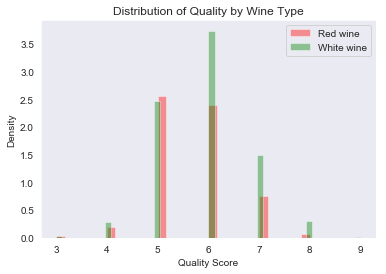

In [15]:
# Look at the distribution of quality by wine type
red_wine = wine.loc[wine['type']=='red', 'quality']
white_wine = wine.loc[wine['type']=='white', 'quality']

sns.set_style("dark")
print(sns.distplot(red_wine, norm_hist=True, kde=False, color="red", label="Red wine"))
print(sns.distplot(white_wine, norm_hist=True, kde=False, color="green", label="White wine"))
sns.utils.axlabel("Quality Score", "Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

In [16]:
# Test whether mean quality is different between red and white wines
print(wine.groupby(['type'])[['quality']].agg(['std', 'mean']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f  pvalue: %.4f' % (tstat, pvalue))

        quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909
tstat: -9.686  pvalue: 0.0000


In [22]:
# 使用最小二平方估計法的線性迴歸
# Fit a multivariate linear regression model  擬合多元線性迴歸模型
# wine_standardized = (wine - wine.mean()) / wine.std()
# formula_all = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + \
# pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'

# 將一個字串指派給變數 my_formula。這個字串包含指定迴歸公式的 Rstyle 語法。波狀符號（~）左邊的變數 quality 是應變數，波狀符號
# 右邊的變數都是自變數。
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + \
residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'

#formula_all = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + \
# free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'
#formula = 'quality ~ residual_sugar + alcohol'

# 使用公式來擬合一個普通最小平方迴歸模型，並將結果指派給變數 lm。
lm = ols(my_formula, data=wine).fit()

# 使用廣義線性模型（glm）語法來擬合相同的模型的線性迴歸，取代普通最小平方語法。
#lm = glm(my_formula, data=wine, family=sm.families.Gaussian()).fit() 
#lm = smf.glm(formula_all, data=wine_standardized, family=sm.families.Gaussian()).fit()

# 印出結果摘要。這個摘要很實用，因為它會在一個畫面上顯示係數、它們的標準差與信賴區間、調整後的 R 平方值、F 統計量，及其他模型資訊。
print(lm.summary())
print('*'*125)

# 印出你可以從模型物件 lm 取出的所有數據。看一下這個清單，我們希望取出係數、它們的標準差、R 平方值、F 統計量與它的 p 值，及擬合值。
print("\nQuantities you can extract from the result:\n%s" % dir(lm))
print('*'*125)

# lm.params 會以 Series 回傳係數值，讓你可以用位置或名稱來取出各個係數。例如，要取出 alcohol 的係數 0.267，你可以使用
# lm.params[1] 或 lm.params['alcohol']。
print("\nCoefficients:\n%s" % lm.params)

# lm.bse 會以 Series 來回傳係數的標準誤差。
print("\nCoefficient Std Errors:\n%s" % lm.bse)

# lm.rsquared_adj 會回傳調整後的 R 平方值。
print("\nAdj. R-squared:\n%.2f" % lm.rsquared_adj)

# lm.fvalue, lm.f_pvalue 會分別回傳 F 統計量與它的 p 值。
print("\nF-statistic: %.1f  P-value: %.2f" % (lm.fvalue, lm.f_pvalue))

# lm.fittedvalues 會回傳擬合值。但並未顯示所有的擬合值，而是在觀測數量 lm.nobs 之後顯示它們的數量，來確定它們有相同的長度。
print("\nNumber of obs: %d  Number of fitted values: %s" % (lm.nobs, len(lm.fittedvalues)))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        11:55:16   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

### 解譯係數

如果你想要使用這個模型來瞭解應變數（酒品質）與自變數（十一種酒的特性）之間的關係，就需要這個解譯係數。每一個係數都代表酒品質的平均差，
比較其中一個自變數有一個單位的差異，但其他自變數完全相同的酒。例如，alcohol 的係數指出，平均來看，如果兩種酒的其他自變數的值都相同，
那麼 alcohol 多一個單位的酒，品質分數會比 alcohol 少的酒高 0.27 分。

解讀所有係數不一定有價值。例如，截距（intercept）係數代表：當所有自變數的值都被設為零時，期望的品質分數。因為沒有一種酒的所有特性值都
是零，所以截距係數沒有任何意義。

### 標準化自變數

關於模型，另一件要記住的事情是，普通最小平方迴歸會將殘差的平方和（從擬合的函數觀察的應變數偏差）最小化，來估計未知的 β 參數的值。因為
殘差的大小取決於自變數的單位，如果它的單位會有很大的變化，你可以將自變數標準化，來方便解讀模型。**將變數標準化的方式，是將每個觀察值減去
變數的平均值，並將每一個結果除以變數的標準差。**藉由將變數標準化，你可以讓它的平均值為 0，標準差為 1。

使用 wine.describe()，我們可以看到，當 total sulfur dioxide 從 6.0（min）變成 440.0（max）時，chlorides 會從 0.009（min）變成 
0.661（max）。其他的變數在它們的最小與最大值之間，都有類似的差異。鑒於每一個自變數的值的範圍有所差異，你可以將自變數標準化，來看看這樣
做是否可以更容易解讀結果。

pandas 可讓你很輕鬆地在 DataFrame 之中將變數標準化。你只要編寫一筆觀測公式，pandas 就會將它傳播到每一列與每一欄，來將所有變數標準化。
接下來的程式會建立一個新的 DataFrame wine_standardized，使用自變數：

In [18]:
# Fit a multivariate linear model with standardized independent variables  擬合具有標準化自變量的多元線性模型

# 建立一個 Series dependent_variable 來保存品質資料（應變數）
dependent_variable = wine['quality']

# 建立一個 DataFrame independent_variables 來保存原始資料集除了  quality, type, in_sample 之外的所有變數
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]

# 標準化自變數。對於每一個變數，將每一個觀測值減去變數的平均值，並將結果除以變數的標準差
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()

# 將應變數 quality（dependent_variable）加為自變數的 DataFrame 的一個欄位，來以標準化的自變數建立一個新資料集
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)

# 重新執行迴歸，來查看使用標準化自變數資料集的摘要資料。
# 將自變數標準化，會改變我們解讀係數的方式。現在每一個係數都代表酒品質的平均標準差差異，以比較當酒的其他自變數完全一樣的情況下，其中
# 一個自變數在一個標準差時的差異。例如， alcohol 的係數指出，平均來看，比較兩個所有其他自變數的值都一樣的酒，alochol 多一個標準差
# 的酒，品質分數會比 alcohol 較少的酒高 0.32 標準差。

lm_standardized = ols(my_formula, data=wine_standardized).fit()

print(lm_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Wed, 22 May 2019   Prob (F-statistic):               0.00
Time:                        11:28:57   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

將自變數標準化，會改變我們解讀係數的方式。現在每一個係數都代表酒品質的平均標準差差異，以比較當酒的其他自變數完全一樣的情況下，其中一個
自變數在一個標準差時的差異。例如，alcohol 的係數指出，平均來看，比較兩個所有其他自變數的值都一樣的酒，alcohol 多一個標準差的酒，品質
分數會比 alcohol 較少的酒高 0.32 標準差。

再次使用 wine.describe()，我們可以看到 alcohol 的平均值與標準差是 10.5 與 1.2，quality 的平均值與標準差是 5.8 與 0.9。因此，比較
兩個其他自變數相同的酒，我們可以預期 alcohol 含量 11.7（10.5 + 1.2）的酒的品質分數，會比 alcohol 含量為平均值（10.5）的酒，平均高
0.32 標準差。

將自變數標準化也會改變我們解讀截距的方式。使用標準化的解釋變數，這個截距會呈現當所有自變數都是它們的平均值時，應變數的平均值為何。在我們
的模型摘要中，截距的係數指出，當酒的所有特性都在它的平均值時，我們可以預計標準誤差 0.0009 的平均分數是 5.8。

### 進行預測

在某些情況下，你可能想要使用沒有被用來擬合模型的新資料進行預測。例如，你可能會收到新的酒特性觀測值，想要透過它們的特性來預測酒的品質
分數。我們來說明如何從既有的資料集選出前 10 筆觀測值，來預測新資料，並根據它們的特性來預測品質分數。

釐清一下，為了方便與示範，我們會使用曾被用來擬合模型的觀測值。除了這個範例之外，你應該會使用未被用來擬合模型的資料來評估模型，並且對新
的觀測值進行預測。知道這一點之後，我們來建立一組新的觀測值，並且用這些觀測值來預測酒的品質。

In [19]:
# Predict quality scores for "new" observations  預測「新」觀察的品質分數

# 用酒資料集的前 10 筆紀錄來建立 10 筆「新」的觀察記錄，新觀測紀錄只能包含模型中使用的自變數模型
new_observations = wine.loc[wine.index.isin(range(10)), independent_variables.columns]

# 使用新觀測記錄的特性來預測品質分數
y_predicted = lm.predict(new_observations)

# 將預測值進位成兩位小數，並將他們輸出到螢幕
y_predicted_rounded = [round(score, 2) for score in y_predicted]
print(y_predicted_rounded)

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69]


變數 y_predicted 裡面有 10 個預測值。之所以將預測值四捨五入為二位小數，只是為了讓輸出更容易閱讀。如果我們在這個範例中使用的觀測紀錄
真的是新的，我們可以使預測的值來評估模型。在任何情況下，我們都可以取得預測值，並且在其他用途中使用。